# kmeans clustering from scratch

import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## k means clustering with random initialization

In [2]:
#helper function
#categorize the datas into certian clusters
def categ(clusters,datas):
    d={}
    for data in datas:
        corr_dist=float('inf')
        for i,cluster in enumerate(clusters):
            dist=np.linalg.norm(data-cluster)
            if dist<corr_dist:
                corr_dist=dist
                corr_cluster_i=i
        if corr_cluster_i in d:
            d[corr_cluster_i].append(data)
        else:
            d[corr_cluster_i]=[data]
    return d

In [3]:
def kmeans_c(datas,num_clusters):
    clusters=datas[np.random.choice(range(len(datas)),num_clusters,replace=False)]
    d=categ(clusters,datas)
    while True:
        new_clusters=[]
        s=0
        for key,value in d.items():
            new_cluster=np.mean(np.array(value),axis=0)
            new_clusters.append(new_cluster)
            s+=np.linalg.norm(clusters[key]-new_cluster)
        if s==0:
            return d
        else:
            clusters=new_clusters
            d=categ(clusters,datas)

## k means clustering with kmeans++ initialization

In [72]:
#kmeans++ initialization
def kmeans_init(datas,num_clusters):
    p=int(np.log10(len(datas)))
    clusters=[]
    clusters.append(datas[np.random.choice(range(len(datas)))])
    for i_ in range(1,num_clusters):
        d={}
        total=0
        for i,data in enumerate(datas):
            d[i]=min([np.linalg.norm(data-clusters[j]) for j in range(i_)])
            total+=d[i]
        l=[]
        max_proba=0
        for i,data in enumerate(datas):
            proba=d[i]/total
            l+=[data]*int(proba*pow(10,p))
            if proba>max_proba:
                max_proba=proba
                max_i=i
        if l==[]:
            clusters.append(datas[max_i])
        else:
            clusters.append(l[np.random.choice(range(len(l)))])
    return clusters

In [73]:
def kmeans_c_init(datas,num_clusters):
    clusters=kmeans_init(datas,num_clusters)
    d=categ(clusters,datas)
    while True:
        new_clusters=[]
        s=0
        for key,value in d.items():
            new_cluster=np.mean(np.array(value),axis=0)
            new_clusters.append(new_cluster)
            s+=np.linalg.norm(clusters[key]-new_cluster)
        if s==0:
            return d
        else:
            clusters=new_clusters
            d=categ(clusters,datas)

plots the 2D datas

In [6]:
def plot_kmeans_c(d):
    for key,value in d.items():
        value=np.array(value)
        plt.scatter(value[:,0],value[:,1])

## deploy the kmeans algorithm

In [7]:
from sklearn.datasets import make_blobs

In [9]:
#generate the datas
X, y = make_blobs(n_samples=10000, centers=5, cluster_std=0.5)

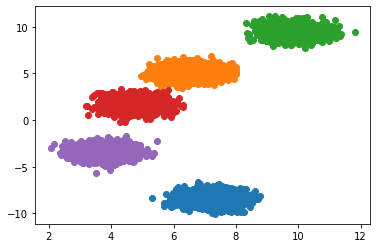

In [10]:
d=kmeans_c(X,5)
plot_kmeans_c(d)

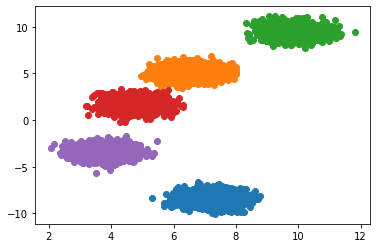

In [11]:
d=kmeans_c_init(X,5)
plot_kmeans_c(d)

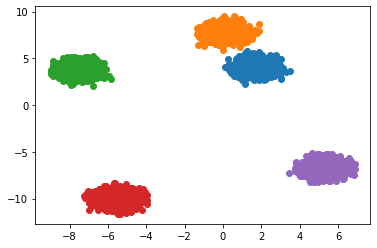

In [39]:
#generate the datas
X, y = make_blobs(n_samples=10000, centers=5, cluster_std=0.5)
d=kmeans_c_init(X,5)
plot_kmeans_c(d)

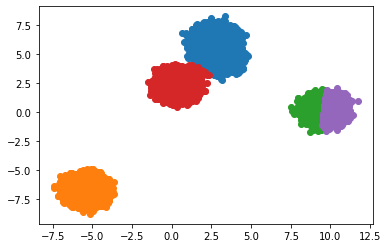

In [75]:
X, y = make_blobs(n_samples=90000, centers=6, cluster_std=0.5)
d=kmeans_c_init(X,5)
plot_kmeans_c(d)

In [74]:
X, y = make_blobs(n_samples=90000, centers=5, cluster_std=0.5)
kmeans_init(X,5)

[array([ 7.20632044, -8.46618349]),
 array([-8.03959172, -3.31974581]),
 array([7.86658232, 4.92664916]),
 array([ 9.25449904, -1.90584976]),
 array([5.92992534, 0.34584293])]